### **Exercice  semaine 4-Data**

- Date limite de soumission des réponses: Jeudi  25 avril 2023 à 10h

- Discussion en ligne  : Vendredi 26 avril 2023 à 16h

- Thématiques abordées : Scikit-learn et modèles de classification de machine learning


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings('ignore')

1.	Importer la base de données « pleuresie »  dans votre environnement de travail et nommer cette base « data » après importation. Montrer la preuve de la réussite de l’importation.
Cette table de données est disponible à l’adresse URL : https://raw.githubusercontent.com/pefura/IFPERA/main/base_pleuresie.csv


In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/pefura/IFPERA/main/base_pleuresie.csv", sep=';')
print(data.shape)

(240, 10)


In [4]:
data.head(3)

,Ageanne,Sexe,Vih,Poids,Taille,proteinespleurales,CRPpleurale,LDHpleurale,glucosepleural,TbPleu
0,51,2,1,40,"1,53","44,3","32,8",1243,"0,72",1
1,67,2,0,40,"1,66","47,5","34,75",744,"0,89",1
2,42,1,0,44,"1,72",38,"5,97",724,"0,44",1


In [5]:
df = data

> <font color=blue>Prétraitement</font>

In [6]:
#data["Poids", "Taille", "proteinespleurales", "CRPpleurale", "glucosepleural", "Ageanne", "LDHpleurale"] = data["Poids", "Taille", "proteinespleurales", "CRPpleurale", "glucosepleural", "Ageanne", "LDHpleurale"].astype(str)
#data["Poids", "Taille", "proteinespleurales", "CRPpleurale", "glucosepleural", "Ageanne", "LDHpleurale"] = data["Poids", "Taille", "proteinespleurales", "CRPpleurale", "glucosepleural", "Ageanne", "LDHpleurale"].str.replace(",", ".")
#data["Poids", "Taille", "proteinespleurales", "CRPpleurale", "glucosepleural", "Ageanne", "LDHpleurale"] = data["Poids", "Taille", "proteinespleurales", "CRPpleurale", "glucosepleural", "Ageanne", "LDHpleurale"].astype(float)

In [7]:
data["Poids"] = data["Poids"].astype(str)
data["Poids"] = data["Poids"].str.replace(",", ".")
data["Poids"] = data["Poids"].astype(float)

data["Taille"] = data["Taille"].astype(str)
data["Taille"] = data["Taille"].str.replace(",", ".")
data["Taille"] = data["Taille"].astype(float)

data["proteinespleurales"] = data["proteinespleurales"].astype(str)
data["proteinespleurales"] = data["proteinespleurales"].str.replace(",", ".")
data["proteinespleurales"] = data["proteinespleurales"].astype(float)

data["CRPpleurale"] = data["CRPpleurale"].astype(str)
data["CRPpleurale"] = data["CRPpleurale"].str.replace(",", ".")
data["CRPpleurale"] = data["CRPpleurale"].astype(float)

data["glucosepleural"] = data["glucosepleural"].astype(str)
data["glucosepleural"] = data["glucosepleural"].str.replace(",", ".")
data["glucosepleural"] = data["glucosepleural"].astype(float)

data["Ageanne"] = data["Ageanne"].astype(str)
data["Ageanne"] = data["Ageanne"].str.replace(",", ".")
data["Ageanne"] = data["Ageanne"].astype(float)

data["LDHpleurale"] = data["LDHpleurale"].astype(str)
data["LDHpleurale"] = data["LDHpleurale"].str.replace(",", ".")
data["LDHpleurale"] = data["LDHpleurale"].astype(float)

In [8]:
data['IMC'] = (data['Poids']/data['Taille']**2).round(2)
data = data.drop(columns=['Poids','Taille'])
data.head(3)

,Ageanne,Sexe,Vih,proteinespleurales,CRPpleurale,LDHpleurale,glucosepleural,TbPleu,IMC
0,51.0,2,1,44.3,32.80,1243.0,0.72,1,17.09
1,67.0,2,0,47.5,34.75,744.0,0.89,1,14.52
2,42.0,1,0,38.0,5.97,724.0,0.44,1,14.87


3.	Installer la bibliothèque (ou la librairie) «scikit-learn » et montrer la preuve de la réussite d’installation. Toutes les informations utiles pour l’utilisation de cette librairie sont disponibles à l’adresse : https://scikit-learn.org/stable/

In [10]:
#pip install scikit-learn

4.	Expliquer les bases du modèle de classification « d’arbre de décision » ou « decision tree ».

<bling><em><big><br><strong><center>Un arbre de décision est un organigramme élaboré autour d’une idée principale et qui se subdivise ensuite en fonction des conséquences de vos décisions</center></strong></br><br><font color=green>Un arbre de décision comporte les symboles suivants :<br>Branches d’alternatives : des lignes qui partent d’une décision représentée sur votre arbre. Ces branches indiquent les résultats (options) ou décisions qui découlent de la décision initiale.</br><br>Nœud de décision : un carré qui représente une décision à prendre. Tout arbre décisionnel commence par ce symbole.</br><br>Nœud d’opportunité : un cercle qui représente un résultat parmi tous ceux possibles.</br><br>Nœud final : un triangle qui indique le résultat définitif (la fin de l’arbre).</br></font></br></em></big></bling>

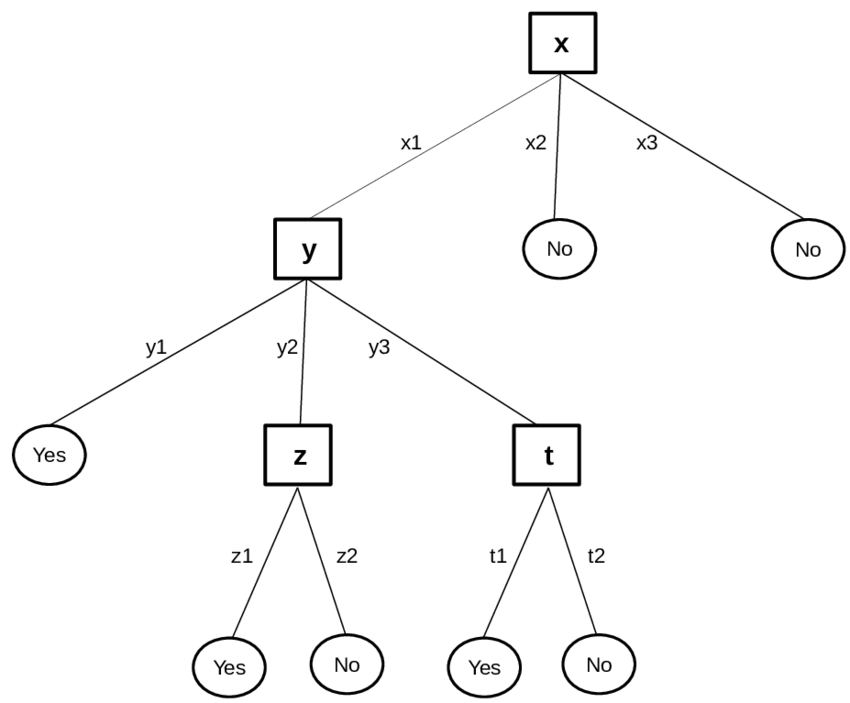

5.	Expliquer les bases du modèle de classification « Random Forest».

<bling><em><br><strong>Le modèle de classification « Random Forest» permet d'assembler les sorties de plusieurs arbres de décision pour atteindre un résultat unique.</strong></br><i><font color=green><big>Les arbres décisionnels commencent par une question de base, par exemple : « Est-ce que je dois sortir? ». À partir de là, vous pouvez observer plusieurs éléments pour déterminer une réponse, par exemple le temps qu'il fait ou le momment de la journée. Ces éléments composent les nœuds de décision de l'arbre et agissent comme un moyen de diviser les données. Chaque élément aide une personne à prendre une décision finale qui sera désignée par le nœud feuille. Les observations qui correspondent aux critères suivent la branche « oui » et celles qui ne correspondent pas suivent le chemin alternatif.  Les arbres de décision cherchent à identifier la meilleure subdivision possible pour créer des sous-ensembles de données et sont généralement entraînés par l'algorithme CT (Classification Tree). Des mesures, telles que la précision (accuracy), le rappel (recall), peuvent être utilisées pour évaluer la qualité de la division.</big></font></i><br></br></em></bling>

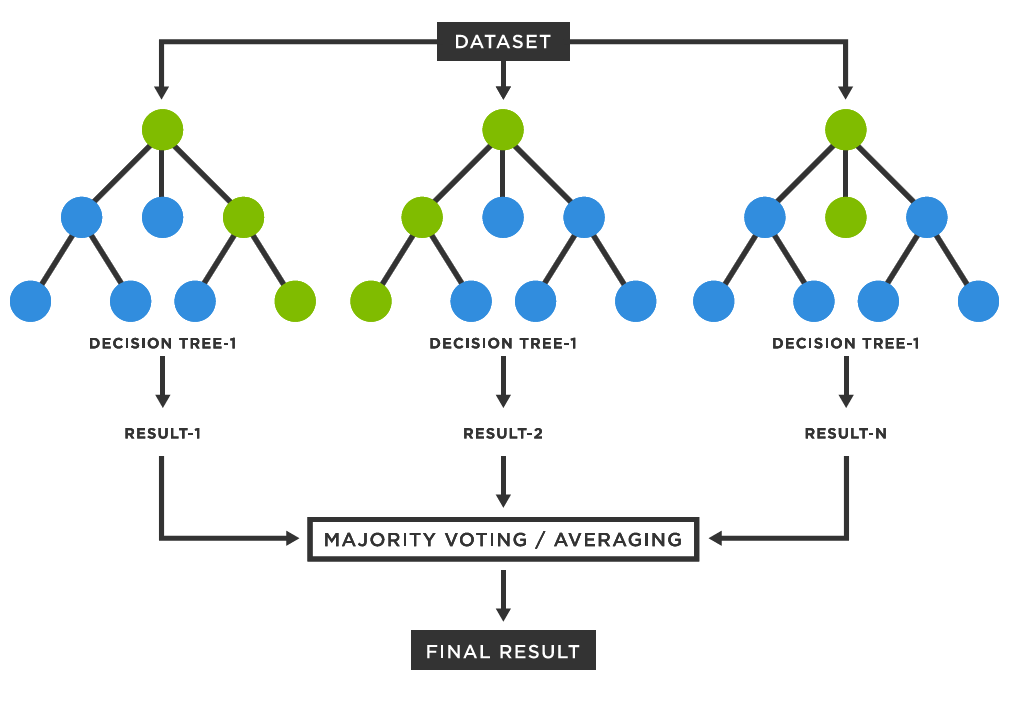

6.	Développer et Evaluer un modèle de « Random Forest» pour prédire le diagnostic de la tuberculose pleurale.

Définition des variables features (x) et de la variable target (Y)

In [11]:
X = data.drop(['TbPleu'], axis=1)

y = data['TbPleu']

In [12]:
# Diviser data en train et test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [13]:
X_train.shape, X_test.shape

((192, 8), (48, 8))

In [14]:
X_train.dtypes

Ageanne               float64
Sexe                    int64
Vih                     int64
proteinespleurales    float64
CRPpleurale           float64
LDHpleurale           float64
glucosepleural        float64
IMC                   float64
dtype: object

In [15]:
y_train.dtypes

dtype('int64')

In [16]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)

# fit the model

rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [17]:
# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with Random forest : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 Random forest : 0.8333


7.	Développer et Evaluer un modèle de « Régression logistique» pour prédire  le diagnostic de la tuberculose pleurale.

In [18]:
# import Random Forest classifier

from sklearn.tree import DecisionTreeClassifier

# instantiate the classifier 

tree_cls = DecisionTreeClassifier(random_state=0)

# fit the model

tree_cls.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [19]:
# Predict the Test set results

y_pred = tree_cls.predict(X_test)



# Check accuracy score 

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.6458


8.	Comparer les deux modèles développés ci-dessus.

> <font color =  blue>Le la forèt aléatoire donne une meilleure précision que l'algorithme d'abres de décion</font>

9.	Faire une sélection des variables pertinentes expliquant le meilleur modèle.

In [20]:
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

CRPpleurale           0.187049
Ageanne               0.182397
IMC                   0.155609
proteinespleurales    0.149141
LDHpleurale           0.138980
glucosepleural        0.130212
Vih                   0.030235
Sexe                  0.026377
dtype: float64

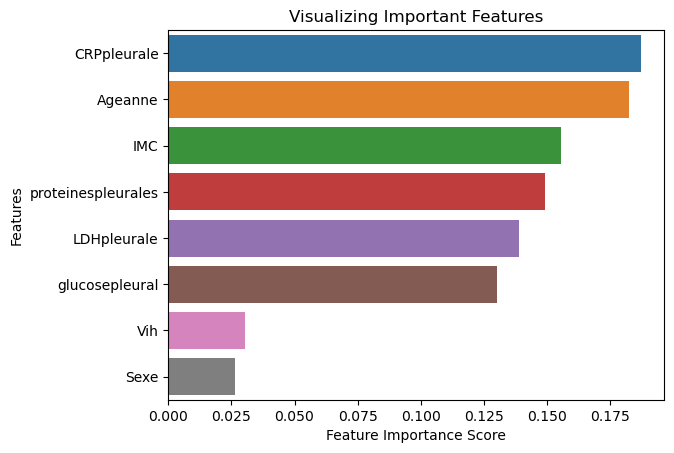

In [21]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

In [22]:
feature_score = pd.Series(tree_cls.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_score

proteinespleurales    0.239455
glucosepleural        0.214645
Ageanne               0.195128
CRPpleurale           0.184817
IMC                   0.111407
LDHpleurale           0.038798
Vih                   0.015750
Sexe                  0.000000
dtype: float64

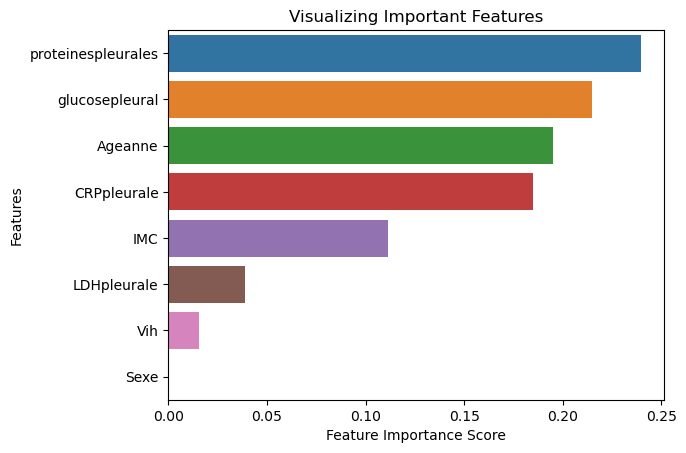

In [23]:
# Creating a seaborn bar plot

sns.barplot(x=feature_score, y=feature_score.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

Nous allons construire un modèle dont Sexe et Vih ne font pas partir des features 

In [274]:
X = data.drop(['TbPleu', 'Sexe', 'Vih',], axis=1)

y = data['TbPleu']

In [278]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [279]:
# instantiate the classifier 

rfc_op = RandomForestClassifier(random_state=0)

# fit the model

rfc_op.fit(X_train1, y_train1)

# Predict the Test set results

y_pred1 = rfc_op.predict(X_test1)



# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 Random forest : {0:0.4f}'. format(accuracy_score(y_test1, y_pred1)))

Model accuracy score with 10 Random forest : 0.8125


In [281]:
# instantiate the classifier 

tree_cls_op = DecisionTreeClassifier(random_state=0)

# fit the model

tree_cls_op.fit(X_train1, y_train1)

# Predict the Test set results

y_pred1 = tree_cls_op.predict(X_test1)



# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 arbre de décision : {0:0.4f}'. format(accuracy_score(y_test1, y_pred1)))

Model accuracy score with 10 arbre de décision : 0.6458
